In [3]:
import torch
import numpy as np

Check if torch package is installed

In [7]:
x = torch.rand(5, 3)

In [8]:
x

tensor([[0.2805, 0.0697, 0.3695],
        [0.3639, 0.2688, 0.1976],
        [0.7734, 0.3567, 0.5619],
        [0.3607, 0.6809, 0.9288],
        [0.8898, 0.9437, 0.8421]])

## Basics

### 1. Tensors

#### Initializing a tensor

In [10]:
x = [[1, 2], [3, 4]]

In [14]:
xt = torch.tensor(x)
print(type(xt))
xt

<class 'torch.Tensor'>


tensor([[1, 2],
        [3, 4]])

In [15]:
xnp = np.array(x)
xt = torch.from_numpy(xnp)
print(type(xt))
xt

<class 'torch.Tensor'>


tensor([[1, 2],
        [3, 4]])

In [17]:
x_ones = torch.ones_like(xt)
x_ones

tensor([[1, 1],
        [1, 1]])

In [20]:
x_rand = torch.rand_like(xt, dtype = torch.float)
x_rand

tensor([[0.7117, 0.4178],
        [0.9631, 0.3451]])

In [23]:
rand_t = torch.rand(5, 3)
ones_t = torch.ones(4, 5)
zeros_t = torch.zeros(1, 3)

#### Attributes of a tensor
More [here](https://pytorch.org/docs/stable/tensor_attributes.html)

In [24]:
xt.shape

torch.Size([2, 2])

In [25]:
xt.device

device(type='cpu')

In [26]:
xt.dtype

torch.int64

#### Operations on tensors
More [here](https://pytorch.org/docs/stable/torch.html)

In [29]:
# moving tensor to the GPU if available
if torch.cuda.is_available():
    xt = xt.to('cuda')

In [30]:
xt.device

device(type='cuda', index=0)

In [33]:
# numpy like slicing annd indexing
print(xt[1])
print(xt[:, 1])

tensor([3, 4], device='cuda:0')
tensor([2, 4], device='cuda:0')


In [42]:
# joining tensors
t1 = torch.cat([x_ones, x_rand], dim = 1)
print(t1)
t2 = torch.cat([x_ones, x_rand], dim = 0)
print(t2)

tensor([[1.0000, 1.0000, 0.7117, 0.4178],
        [1.0000, 1.0000, 0.9631, 0.3451]])
tensor([[1.0000, 1.0000],
        [1.0000, 1.0000],
        [0.7117, 0.4178],
        [0.9631, 0.3451]])


In [53]:
# arithmetic operations
t = torch.rand(2, 3)
print(t)

# matrix multiplication
y1 = t @ t.T; print(y1)
y2 = t.matmul(t.T); print(y2)
y3 = torch.matmul(t, t.T); print(y3)

# element wise product
z1 = t * t ; print(z1)
z2 = t.mul(t); print(z2)

tensor([[0.7136, 0.1295, 0.6589],
        [0.1183, 0.7355, 0.3881]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.9602, 0.4354],
        [0.4354, 0.7056]])
tensor([[0.5093, 0.0168, 0.4342],
        [0.0140, 0.5410, 0.1507]])
tensor([[0.5093, 0.0168, 0.4342],
        [0.0140, 0.5410, 0.1507]])


In [61]:
# single element tensor
t = torch.rand(5, 1)
y = t.T @ t
print(y.item())

# inplace operations
print(t)
t.add_(4)
print(t)

0.8229666948318481
tensor([[0.5133],
        [0.3222],
        [0.0692],
        [0.5482],
        [0.3878]])
tensor([[4.5133],
        [4.3222],
        [4.0692],
        [4.5482],
        [4.3878]])


### 2. Datasets and DataLoaders

Datasets: torch.utils.data.Dataset <br>
Dataloader: torch.utils.data.Dataloader

#### Loading a DataSet

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
training = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())
#training = datasets.FashionMNIST(root = 'data', train = True, download = True)

In [7]:
type(training)

torchvision.datasets.mnist.FashionMNIST

In [18]:
test = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

In [9]:
type(test)

torchvision.datasets.mnist.FashionMNIST

#### Iterating and Visualizing Dataset

In [11]:
training[1] # gives image and label

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA2FC6A2220>, 0)

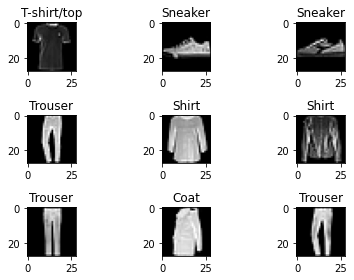

In [13]:
import matplotlib.pyplot as plt
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
n = len(training)
for i in range(9):
    idx = torch.randint(0, n, size = (1,)).item()
    img, l = training[idx]
    ax[i].imshow(img.squeeze(), cmap = 'gray')
    ax[i].set_title(labels[l])
plt.tight_layout()
plt.show()

#### Creating a custom Dataset for your files

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

In [14]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transfrom = transform
        self.target_transform = target_transfotrm
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### Prepapring your data for training using Dataloaders

In [16]:
from torch.utils.data import DataLoader

In [19]:
train_dl = DataLoader(training, batch_size = 64, shuffle = True)
test_dl = DataLoader(test, batch_size = 64, shuffle = True)

#### Iterate through a DataLoader
More [here](https://pytorch.org/docs/stable/data.html)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([64])


Text(0.5, 1.0, 'tensor(8)')

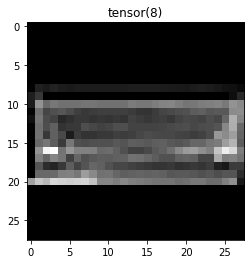

In [35]:
train_features, train_labels = next(iter(train_dl))
print(type(train_features))
print(train_features.shape)

print(type(train_labels))
print(train_labels.shape)

#showing an image
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = 'gray')
plt.title(label)